# A Pilot Study on the Global Population Structure of Portuguese Man of War

## Introduction

Portuguese Man of War are a unique species of siphonophore, a clade of colonial hydrozoans. They are globally distributed across all of the major ocean gyres, in tropical and subtropical waters. They are the most well-known species of siphonophore as they live on the surface of the ocean, where they are propelled by the wind and currents and are frequently blown ashore en-masse. Much of our knowledge of Man of War comes from these near-shore interactions. Their delicate jelly-like nature makes it nearly impossible to tag them or to observe them in a laboratory environment, which combined with the difficulties of recording long-term observational data at sea, means that very little is known about their life on the open oceans. 

Some of the most pressing questions regarding these creatures concern their lifecycle, such as their life span and reproductive strategies (Munro et al, 2019). A greater understanding of the population structure of these animals may provide insights into these unanswered questions. Existing phylogenetic analyses of Portuguese Man of War have revealed that even within a relatively small geographic area there is a substantial amount of genetic diversity, suggesting that, on a global scale, there could be many distinct populations (Pontin & Cruickshank, 2012).

We intend to analyze RADseq data from 32 samples from four different sites - Bermuda, Texas, Guam and South Africa - produced by the Dunn Lab. RADseq, or restriction site associated DNA sequencing, is an efficient way to identify and score many genetic markers for further population genomics or phylogeographic studies. As such, it can provide results of a greater resolution than other methods which give far fewer markers (Davey 2010). An additional benefit is that RADseq data can be assembled de novo, so the full genome of the species of interest is not needed. More relevant to our study, RADseq has been shown to be useful for the phylogeographic and population genomic studies of zooplankton and, in particular, of cnidarians (Blanco-Bercial & Bucklin, 2016, Reitzel et al, 2013).

We will evaluate two different methods for assembling the RADseq data, both based on a reference genome. As the Portuguese Man of War genome is highly repetitive, we will assembly the data on both a complete reference genome as well as a reference genome with the repeat region masked. We will then use PCA and STRUCTURE to examine the population structure across these different sites to inform future studies.

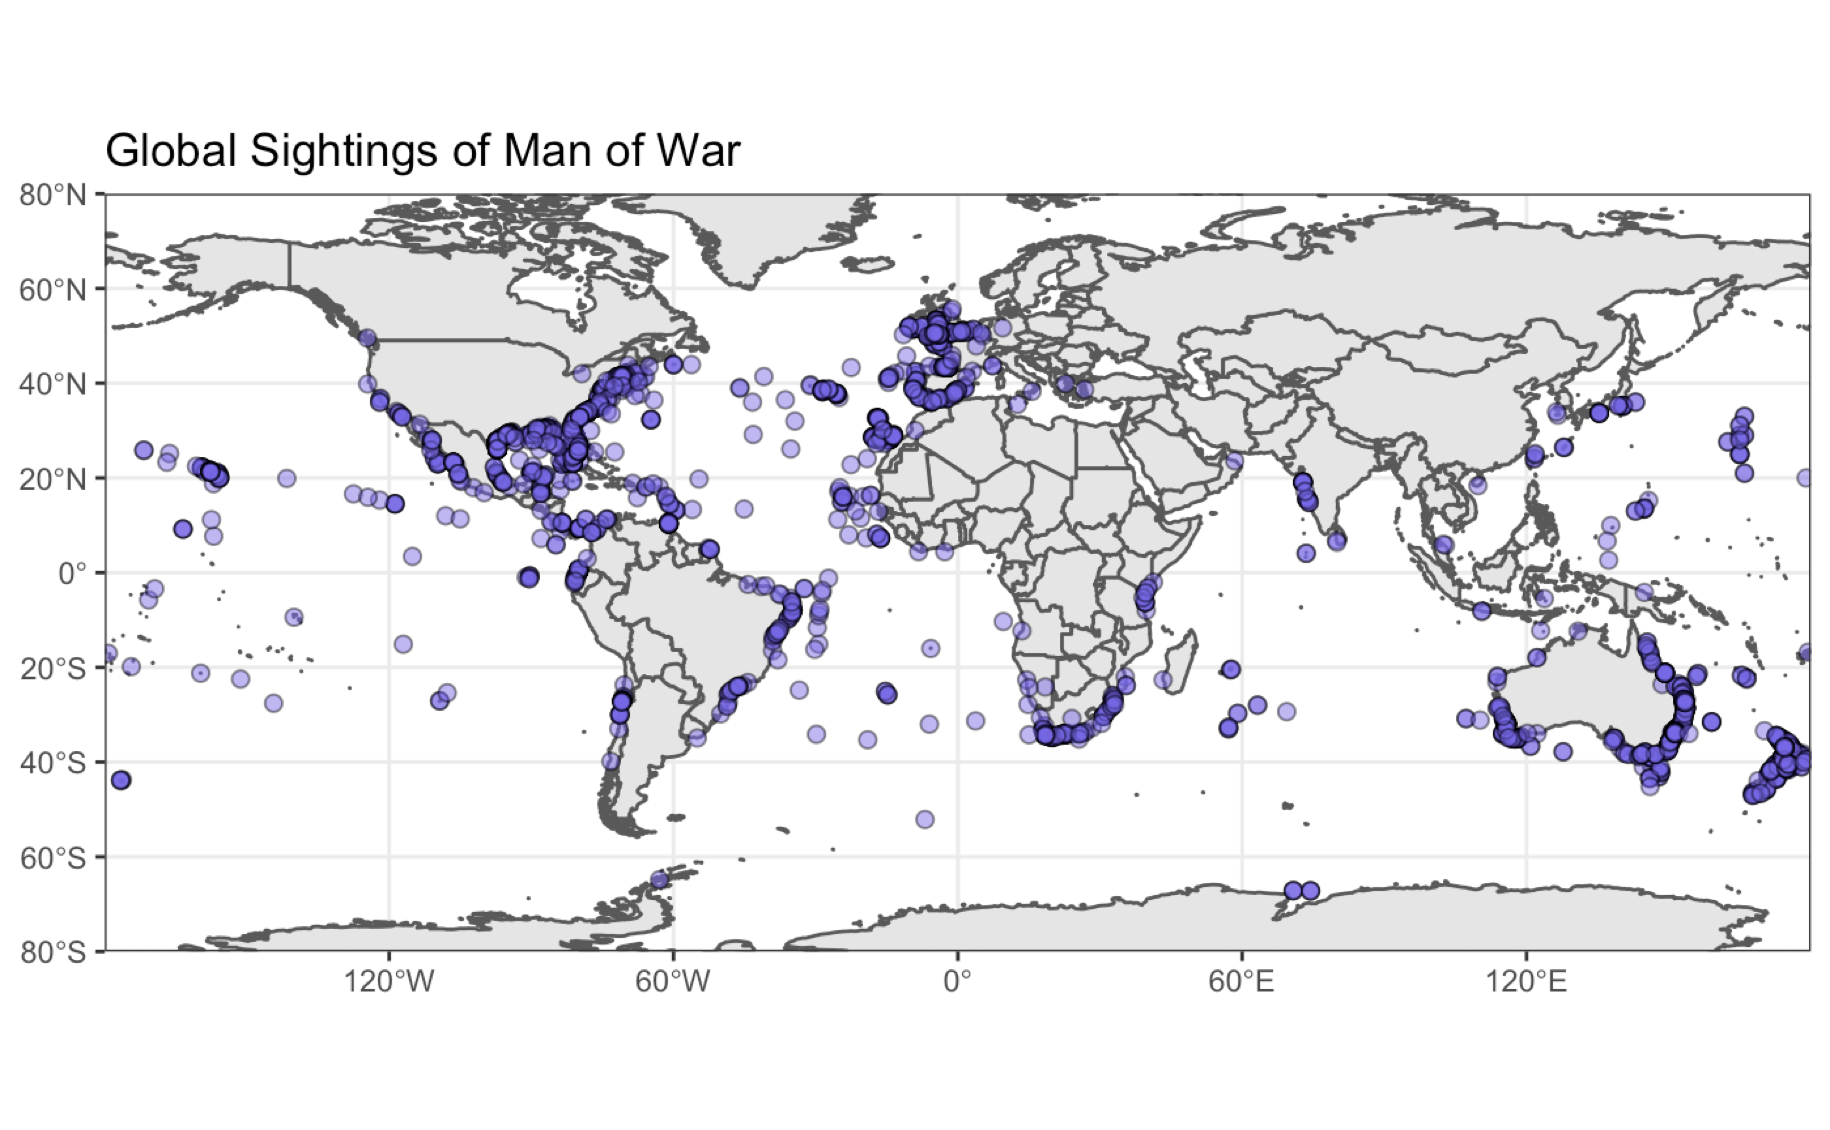

**Figure 1:** Global Distribution of Portuguese Man Of War

## Methods
### ddRAD Assembly with ipyrad
ipyrad was utilized to assemble the raw data (Eaton & Overcast 2020). Assembly with ipyrad is a multistep process, beginning with the loading and demultiplexing of the raw-reads using user-input barcodes. Next, the data is filtered based on the quality of the reads; sites with low-quality reads were transformed into Ns, and reads with more than 5 low qualities reads were discarded. Sequences are then dereplicated, and overlapping paired reads were merged, before being mapped to the reference genome. The reads were then clustered based on sequnce similarity, then aligned. Heterozygosity and error rate were jointly estimated based on these clustered reads. Using these parameters and a binomial model, consensus allele sequencess were estimated. Consensus sequences were clustered across samples, and aligned once more. The final alignments were filtered one last time, then exported in a variety of formats. 

### Analysis of Population Stucture
 
In order to examine the population structure of Portuguese Man of War, we performed principal component analysis (PCA) to reduce the data to relatively few dimensions for visualization purposes, while retaining as much of the data variance as possible. ipyrad provides a easy pipeline to quickly perform PCA on the output data, which we used before plotting the data across the first couple principlal components.

We also used STRUCTURE to estimate the number of ancestral populations from which our samples originated, as well as to examine the admixture proportions of these different populations for each sample. First, to determine the number of ancestral populations that best represents our samples, K , we ran STRUCTURE for a range of K = 2-5 with 20 replicates each. The value for K that maximized the mean probability, as well as the $\Delta$K metric (Evanno et al, 2005) was chosen as the number of ancesteral propulations that best represents our data set. We then plotted the result of STRUCTURE as a barplot to visualize the ancestry proportions for each sample across our different sampling sites.

## Results

In [1]:
# Import libraries
from IPython.display import display, Markdown

import ipyrad.analysis as ipa
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn

### ddRAD Assembly

#### Masked Reference Based Assembly

In [2]:
masked_assembly = pd.read_csv("ipyrad09/phys_both_outfiles/assembly_both_stats.csv", header=0, index_col = 0)
masked_assembly = masked_assembly.drop(columns = ['state', 'reads_raw', 'refseq_unmapped_reads'])
tmp = masked_assembly.describe().drop(index = "count").reset_index().rename(columns = {"index":"stat"}).set_index("stat")
display(Markdown(tmp.to_markdown()))

| stat   |   reads_passed_filter |   refseq_mapped_reads |   clusters_total |   clusters_hidepth |   hetero_est |   error_est |   reads_consens |   loci_in_assembly |
|:-------|----------------------:|----------------------:|-----------------:|-------------------:|-------------:|------------:|----------------:|-------------------:|
| mean   |           4.64307e+06 |      588579           |         157156   |           10555.1  |   0.0138637  |  0.00896553 |         6358.41 |            3906.31 |
| std    |           3.4228e+06  |      344916           |          76441.9 |            7412.79 |   0.00282891 |  0.00145478 |         3534.14 |            1840.79 |
| min    |      411433           |       90606           |          33984   |            1540    |   0.010275   |  0.006847   |         1282    |             907    |
| 25%    |           2.44686e+06 |      356707           |         108100   |            5577.5  |   0.0119695  |  0.0076035  |         4267.25 |            2286.25 |
| 50%    |           3.32257e+06 |      539254           |         152367   |            9591    |   0.013698   |  0.00903    |         5711.5  |            3858.5  |
| 75%    |           6.56709e+06 |      710932           |         191063   |           12164.8  |   0.0148018  |  0.00991475 |         7101.75 |            4791.5  |
| max    |           1.32326e+07 |           1.76268e+06 |         436346   |           38193    |   0.022148   |  0.012212   |        16997    |            8339    |

**Table 1**: Statistics from the masked reference based assembly

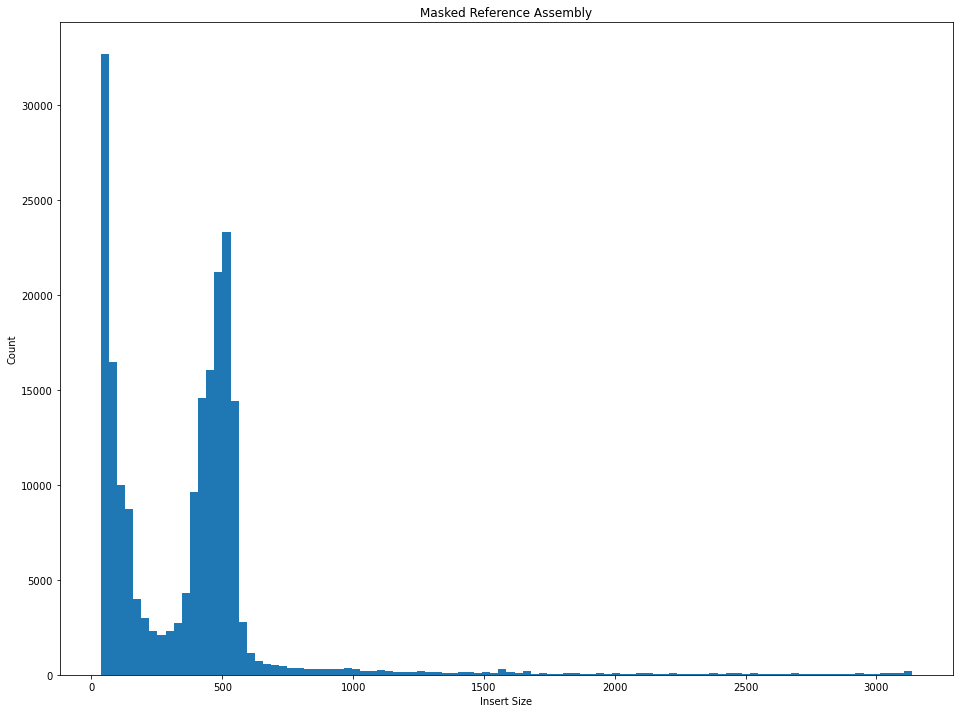

In [3]:
masked_tlens = pd.read_csv("ipyrad09/phys_both_consens/TLENs.csv",header=None, names =["Template", "Sample", "Obs_TLEN"])

fig, ax = plt.subplots(figsize = (16,12))

ax.hist(masked_tlens['Obs_TLEN'], bins = 100)
ax.set_xlabel("Insert Size")
ax.set_ylabel("Count")
ax.set_title("Masked Reference Assembly")
fig.show()

**Figure 2**: Insert sizes for consensus reads, as mapped to the masked reference.  

#### Unmasked Reference Based Assembly

In [4]:
unmasked_assembly = pd.read_csv("ipyrad09/phys_unmasked_outfiles/assembly_unmasked_stats.csv", header=0, index_col = 0, delim_whitespace =True)
unmasked_assembly = unmasked_assembly.drop(columns = ['state', 'reads_raw', 'refseq_unmapped_reads'])
tmp = unmasked_assembly.describe().drop(index = "count").reset_index().rename(columns = {"index":"stat"}).set_index("stat")
display(Markdown(tmp.to_markdown()))

| stat   |   reads_passed_filter |   refseq_mapped_reads |   clusters_total |   clusters_hidepth |   hetero_est |   error_est |   reads_consens |   loci_in_assembly |
|:-------|----------------------:|----------------------:|-----------------:|-------------------:|-------------:|------------:|----------------:|-------------------:|
| mean   |           4.64307e+06 |      754889           |           277461 |           14365.7  |   0.00704537 | 0.00485819  |        11340.7  |            7266.38 |
| std    |           3.4228e+06  |      423550           |           141348 |            9140.54 |   0.00204175 | 0.000691806 |         6195.06 |            3352.94 |
| min    |      411433           |      146402           |            71094 |            3229    |   0.005014   | 0.003273    |         2989    |            2448    |
| 25%    |           2.44686e+06 |      463558           |           172963 |            8703.5  |   0.0057505  | 0.004562    |         7027.75 |            4391.5  |
| 50%    |           3.32257e+06 |      705380           |           246394 |           12537.5  |   0.00622    | 0.0047865   |         9924    |            7333.5  |
| 75%    |           6.56709e+06 |      937362           |           349148 |           17329.2  |   0.0072635  | 0.00522025  |        13677.8  |            9617    |
| max    |           1.32326e+07 |           2.00818e+06 |           735436 |           40738    |   0.012214   | 0.00617     |        31136    |           14309    |

**Table 2**: Statistics from the unmasked reference based assembly

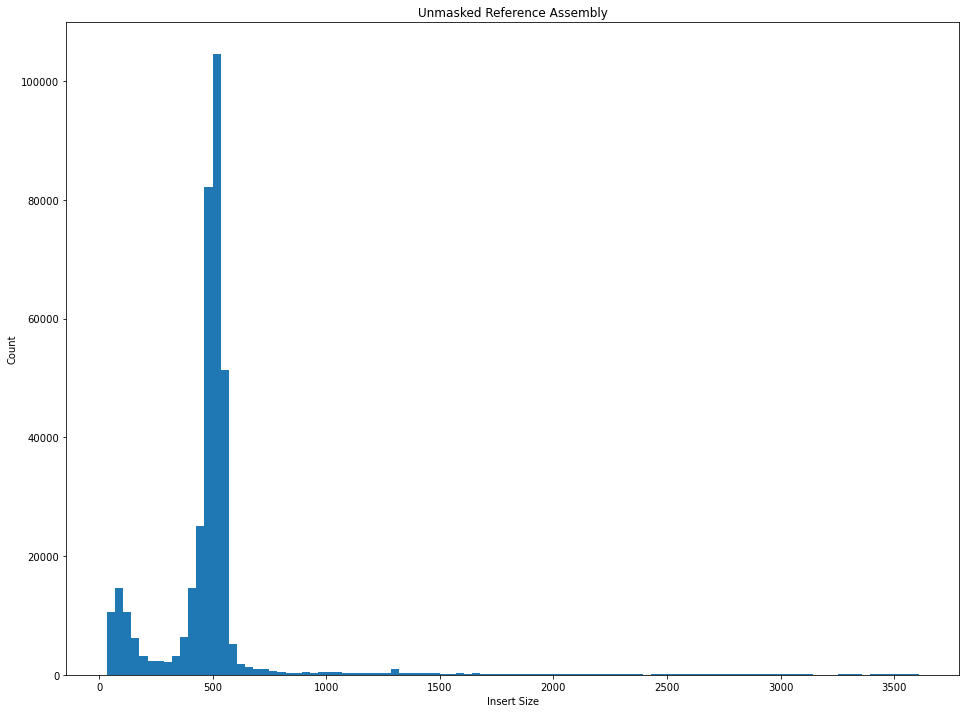

In [5]:
unmasked_tlens = pd.read_csv("ipyrad09/phys_unmasked_consens/TLENs.csv",header=None, names =["Template", "Sample", "Obs_TLEN"])

fig, ax = plt.subplots(figsize = (16,12))

ax.hist(unmasked_tlens['Obs_TLEN'], bins = 100)
ax.set_xlabel("Insert Size")
ax.set_ylabel("Count")
ax.set_title("Unmasked Reference Assembly")
fig.show()

**Figure 3**: Insert sizes for mapped reads, as mapped to the masked reference.  

We find that both the assembly generated from the masked and unmasked reference genomes are able to successful determine thousands of loci from each sample, though on average, the unmasked assembly was able to determine nearly double the loci. Since the number of samples from each location varied drastically, with 21 samples from Bermuda to 6 from Texas, four from Guam and only 1 from South Africa, we found that there were substantially more loci for samples from Bermuda than from any other locations. 

In an effort to verify the quality of the mapping to the reference, we examined the distance covered between paired reads. Due to the size selection performed, we would expect the distance to be around 600bp. The masked reference has a substantial amount of consensus reads that span a much smaller distance, which is maybe suggestive of poor mapping, and so for our further examination of population structure, we will use the assembly based on the unmasked reference genome.

### Population Structure

In [6]:
imap = {
    "berm" : ["Bermuda_100","Bermuda_103", "Bermuda_15", 
              "Bermuda_19", "Bermuda_28", "Bermuda_30", 
              "Bermuda_54", "Bermuda_55", "Bermuda_63",
              "Bermuda_65", "Bermuda_67", "Bermuda_68",
              "Bermuda_69", "Bermuda_94", "Bermuda_8", 
              "Bermuda_80", "Bermuda_84", "Bermuda_85",
              "Bermuda_94"],
    "guam" : ["Guam_104460", "Guam_104461", "Guam_104464",
              "Guam_104465"],
    "s_afr" : ["South_Africa"],
    "texas" : ["8_TX2017_028", "82_TX2016_049", "6_TX2017_027", 
               "59_TX2016_048", "42_TX2016_046", "13_TX2016_043"]
}
minmap = {i: 0.5 for i in imap}

#### Principal Components Analysis 

In [9]:
unmasked_data = "ipyrad09/phys_unmasked_outfiles/phys_unmasked.snps.hdf5"

In [10]:
unmasked_pca = ipa.pca(
    data = unmasked_data,
    imap = imap,
    minmap = minmap,
    mincov = 1,)
unmasked_pca.run(nreplicates=100, seed=123)
results = pd.DataFrame(unmasked_pca.pcaxes[0], index=unmasked_pca.names)

Samples: 29
Sites before filtering: 205250
Filtered (indels): 0
Filtered (bi-allel): 5653
Filtered (mincov): 154
Filtered (minmap): 191734
Filtered (subsample invariant): 12116
Filtered (minor allele frequency): 0
Filtered (combined): 193483
Sites after filtering: 12518
Sites containing missing values: 11700 (93.47%)
Missing values in SNP matrix: 73046 (20.12%)
SNPs (total): 12518
SNPs (unlinked): 524
Imputation (null; sets to 0): 100.0%, 0.0%, 0.0%
Subsampling SNPs: 524/12518


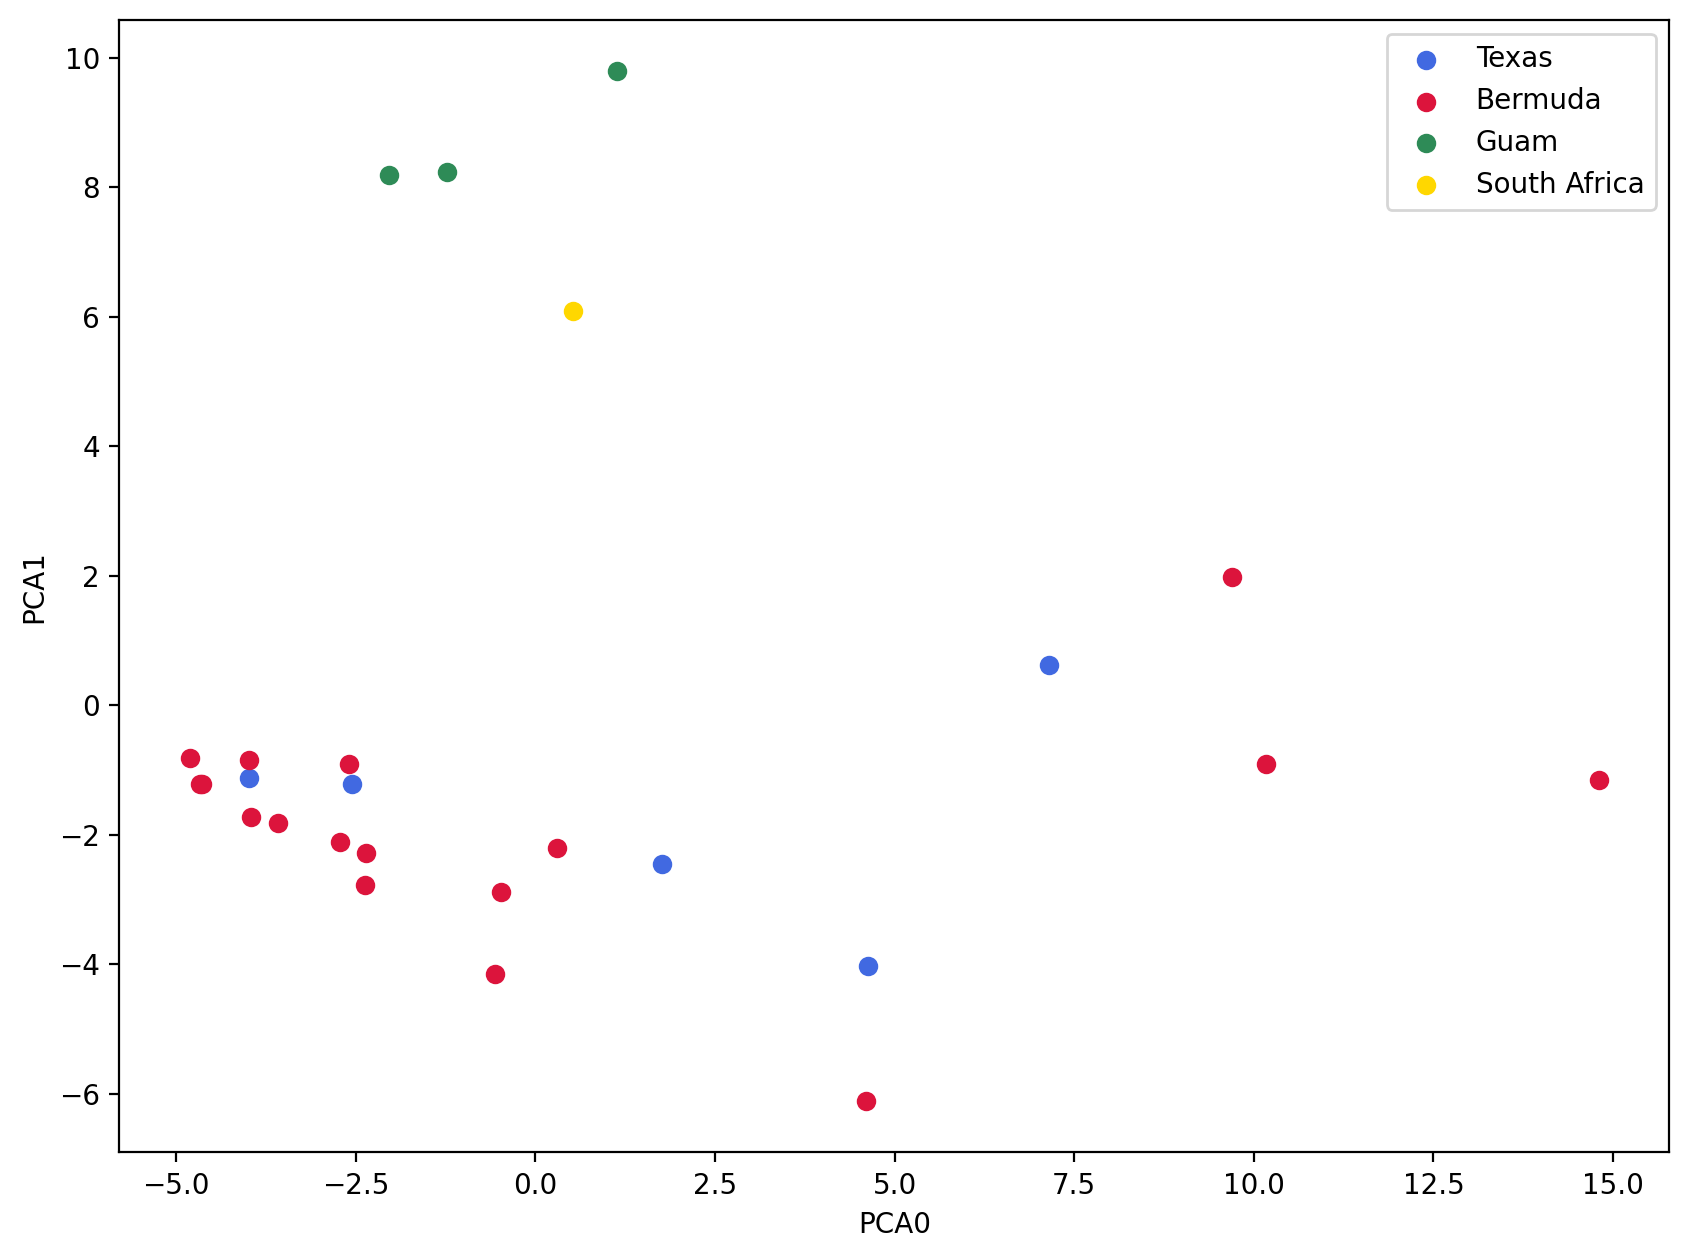

In [11]:
fig, ax = plt.subplots(figsize = (10,7.5), dpi=200)

ax.scatter(results[0].iloc[0:5], results[1].iloc[0:5], c = "royalblue", label = "Texas" )
ax.scatter(results[0].iloc[6:23], results[1].iloc[6:23], c = "crimson", label = "Bermuda" )
ax.scatter(results[0].iloc[24:27], results[1].iloc[24:27], c = "seagreen", label = "Guam" )
ax.scatter(results[0].iloc[28], results[1].iloc[28], c = "gold", label = "South Africa" )

ax.legend()
ax.set_xlabel("PCA0")
ax.set_ylabel("PCA1")

fig.show()

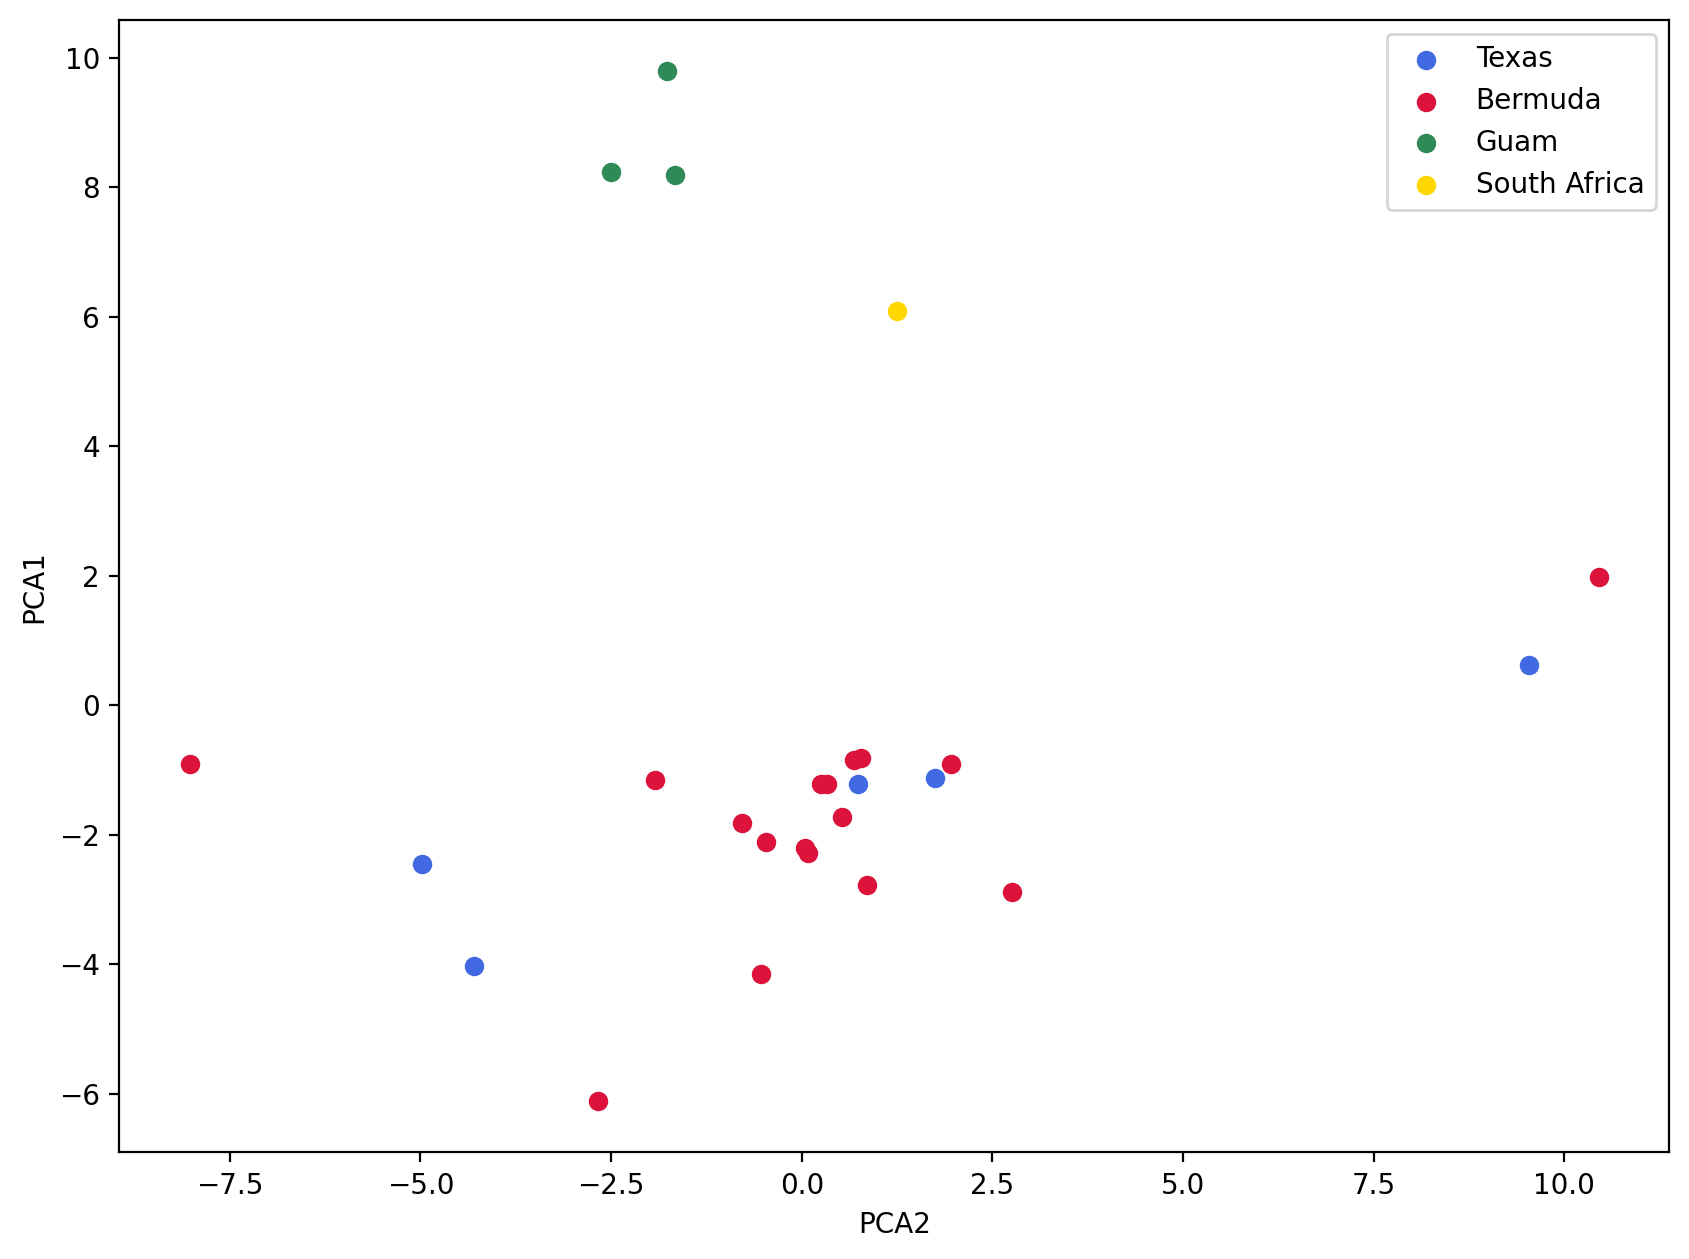

In [16]:
fig, ax = plt.subplots(figsize = (10,7.5), dpi=200)

ax.scatter(results[2].iloc[0:5], results[1].iloc[0:5], c = "royalblue", label = "Texas" )
ax.scatter(results[2].iloc[6:23], results[1].iloc[6:23], c = "crimson", label = "Bermuda" )
ax.scatter(results[2].iloc[24:27], results[1].iloc[24:27], c = "seagreen", label = "Guam" )
ax.scatter(results[2].iloc[28], results[1].iloc[28], c = "gold", label = "South Africa" )

ax.legend()
ax.set_xlabel("PCA2")
ax.set_ylabel("PCA1")

fig.show()

**Figure 4**: Plot of all samples, colored by location sampled, on PCA components. 

Examining results of PCA, we can observe that samples from Texas and Bermuda are fairly well mixed with each, and are fairly separated from those of Guam and South Africa. Guam appears to form its own distinct cluster, seperate from the South Africa sample. We can also observe that primary component 0 and 2 both appear to primarily represent variance with in the Bermuda/Texas group, where as primary component 1 is representing the variation between the Bermuda/Texas group and everything else.  

#### STRUCTURE Analysis

In [18]:
unmasked_struct = ipa.structure(
    name="unmasked",
    data = unmasked_data,
    imap = imap,
    minmap = minmap,
    mincov = 0.9)

unmasked_struct.mainparams.burnin = 5000
unmasked_struct.mainparams.numreps = 10000
unmasked_struct.run(nreps=20, kpop=[2, 3, 4, 5], auto=True)

Samples: 29
Sites before filtering: 205250
Filtered (indels): 0
Filtered (bi-allel): 5653
Filtered (mincov): 201692
Filtered (minmap): 191734
Filtered (subsample invariant): 12116
Filtered (minor allele frequency): 0
Filtered (combined): 203521
Sites after filtering: 2480
Sites containing missing values: 1662 (67.02%)
Missing values in SNP matrix: 2472 (3.44%)
SNPs (total): 2480
SNPs (unlinked): 97
[####################] 100% 0:06:34 | running 80 structure jobs 


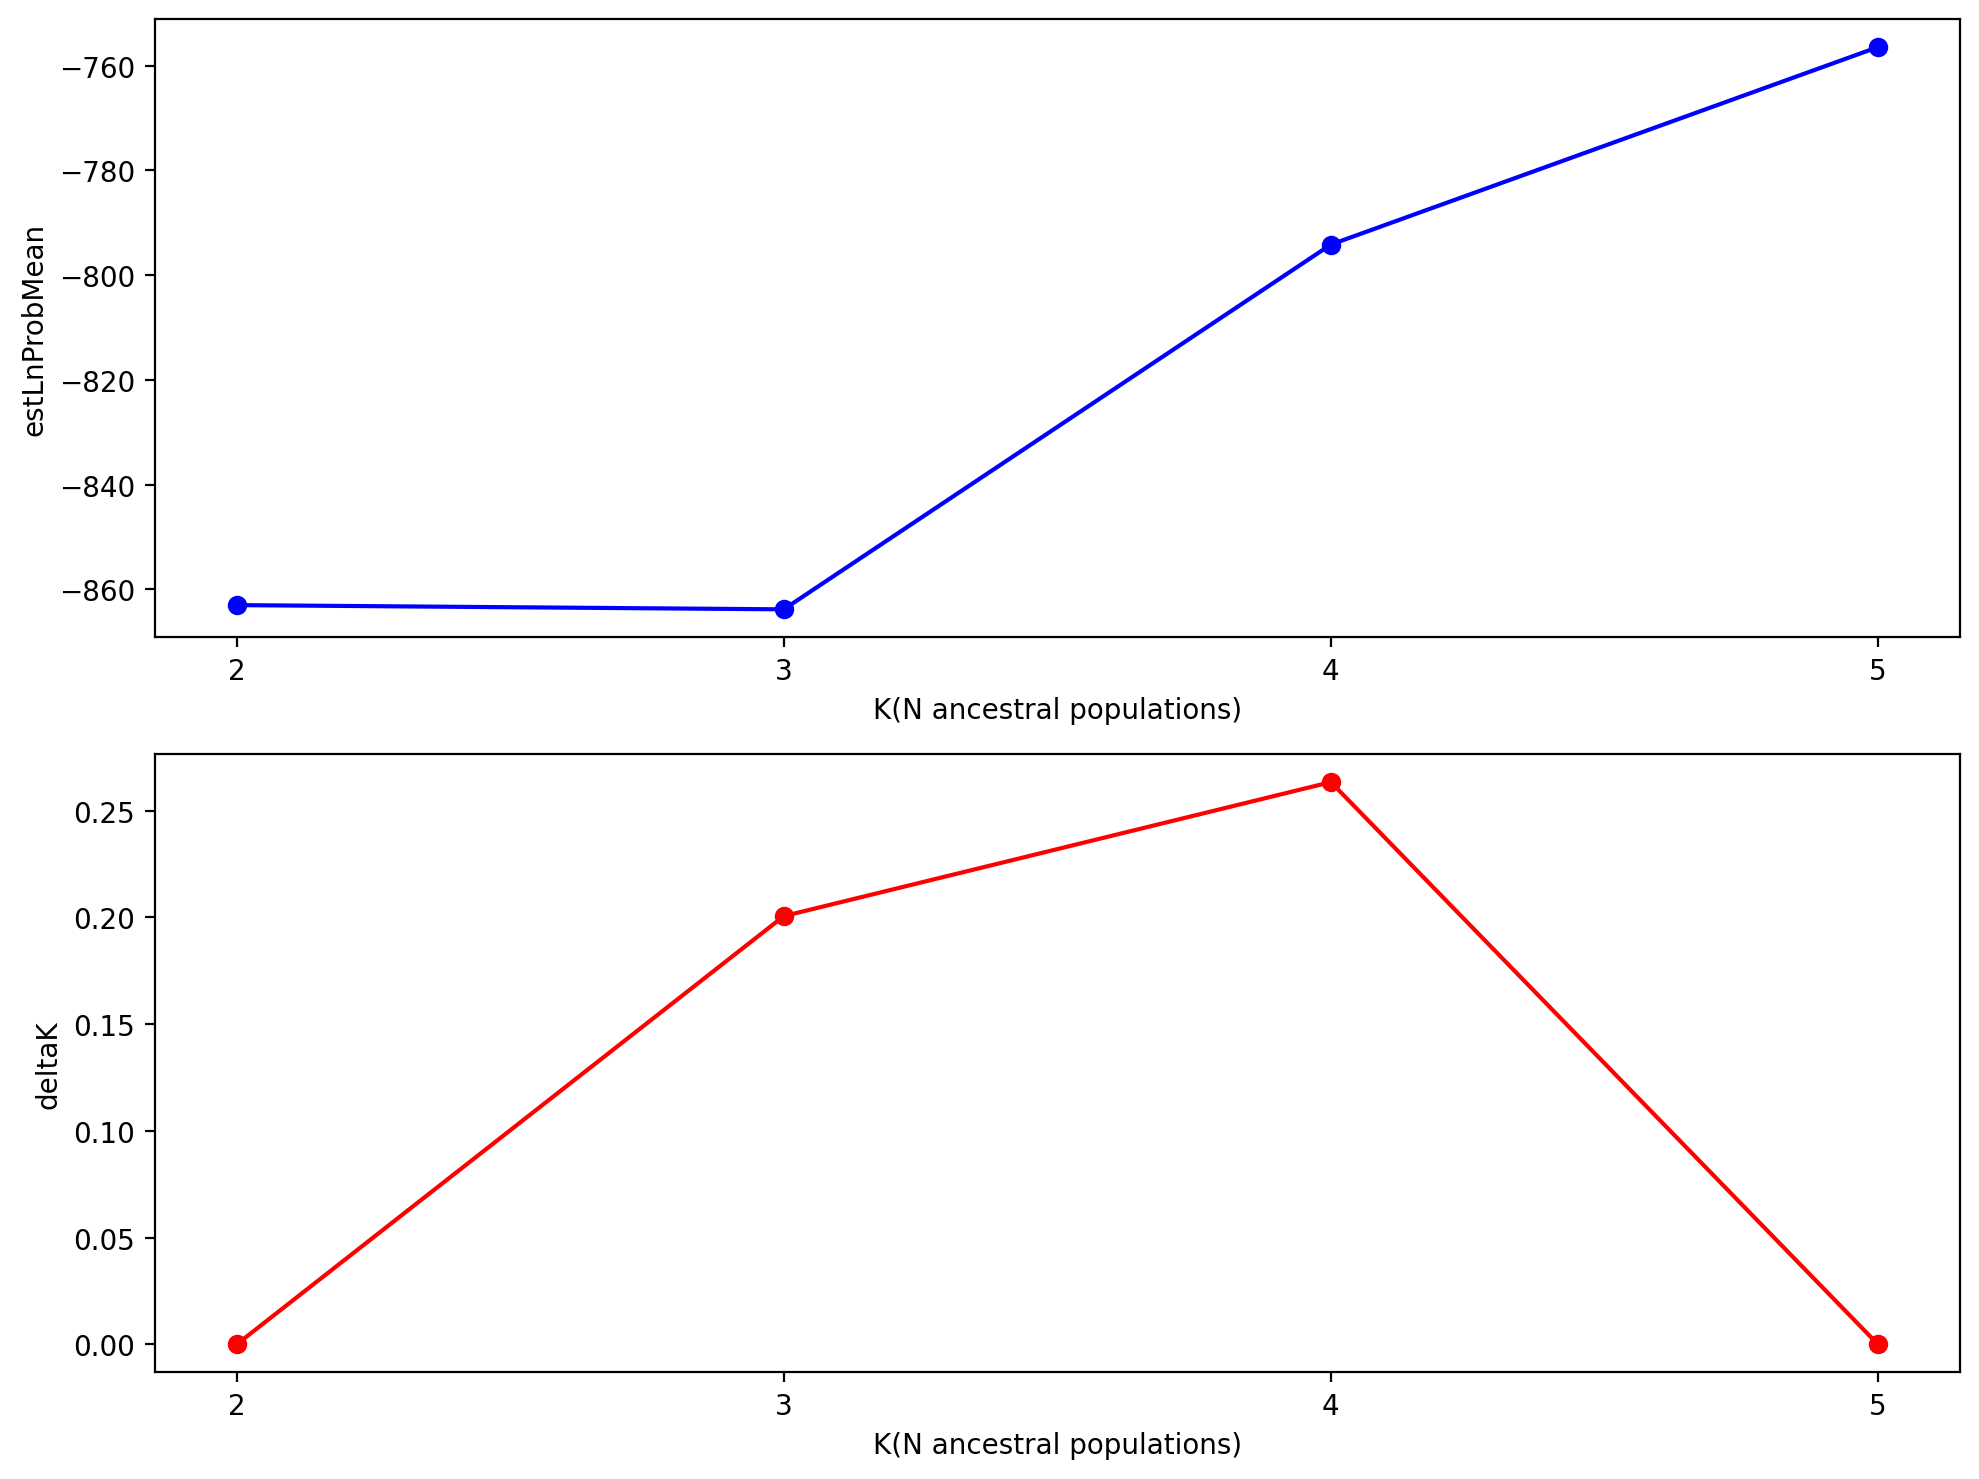

In [20]:
unmasked_etable = unmasked_struct.get_evanno_table([2, 3, 4, 5])

fig, [ax, ax2] = plt.subplots(2,figsize = (10,7.5), dpi=200,)
ax.plot(unmasked_etable.index, unmasked_etable.estLnProbMean, "-bo",)

ax.set_xticks([2,3,4,5])
ax.set_ylabel("estLnProbMean")
ax.set_xlabel("K(N ancestral populations)")


ax2.plot(unmasked_etable.index, unmasked_etable.deltaK, "-ro", zorder=2)

ax2.set_xticks([2,3,4,5])
ax2.set_ylabel("deltaK")
ax2.set_xlabel("K(N ancestral populations)")

fig.tight_layout()
fig.show()


**Figure 5:** $\Delta$ K and mean estimated Ln(P) for each ancestral population, K. 

We find that the most probable number of ancestral population is K = 4, as the metric $\Delta$ K is maximized at K = 4. As such, we will look at ancestral proportions for 4 ancestral populations. 

In [23]:
k = 4
table = unmasked_struct.get_clumpp_table(k)
# sort list by columns
table.sort_values(by=list(range(k)), inplace=True)

# or, sort by a list of names (here taken from imap)
import itertools
onames = list(itertools.chain(*imap.values()))
table = table.loc[onames]

[K4] 20/20 results permuted across replicates (max_var=0).


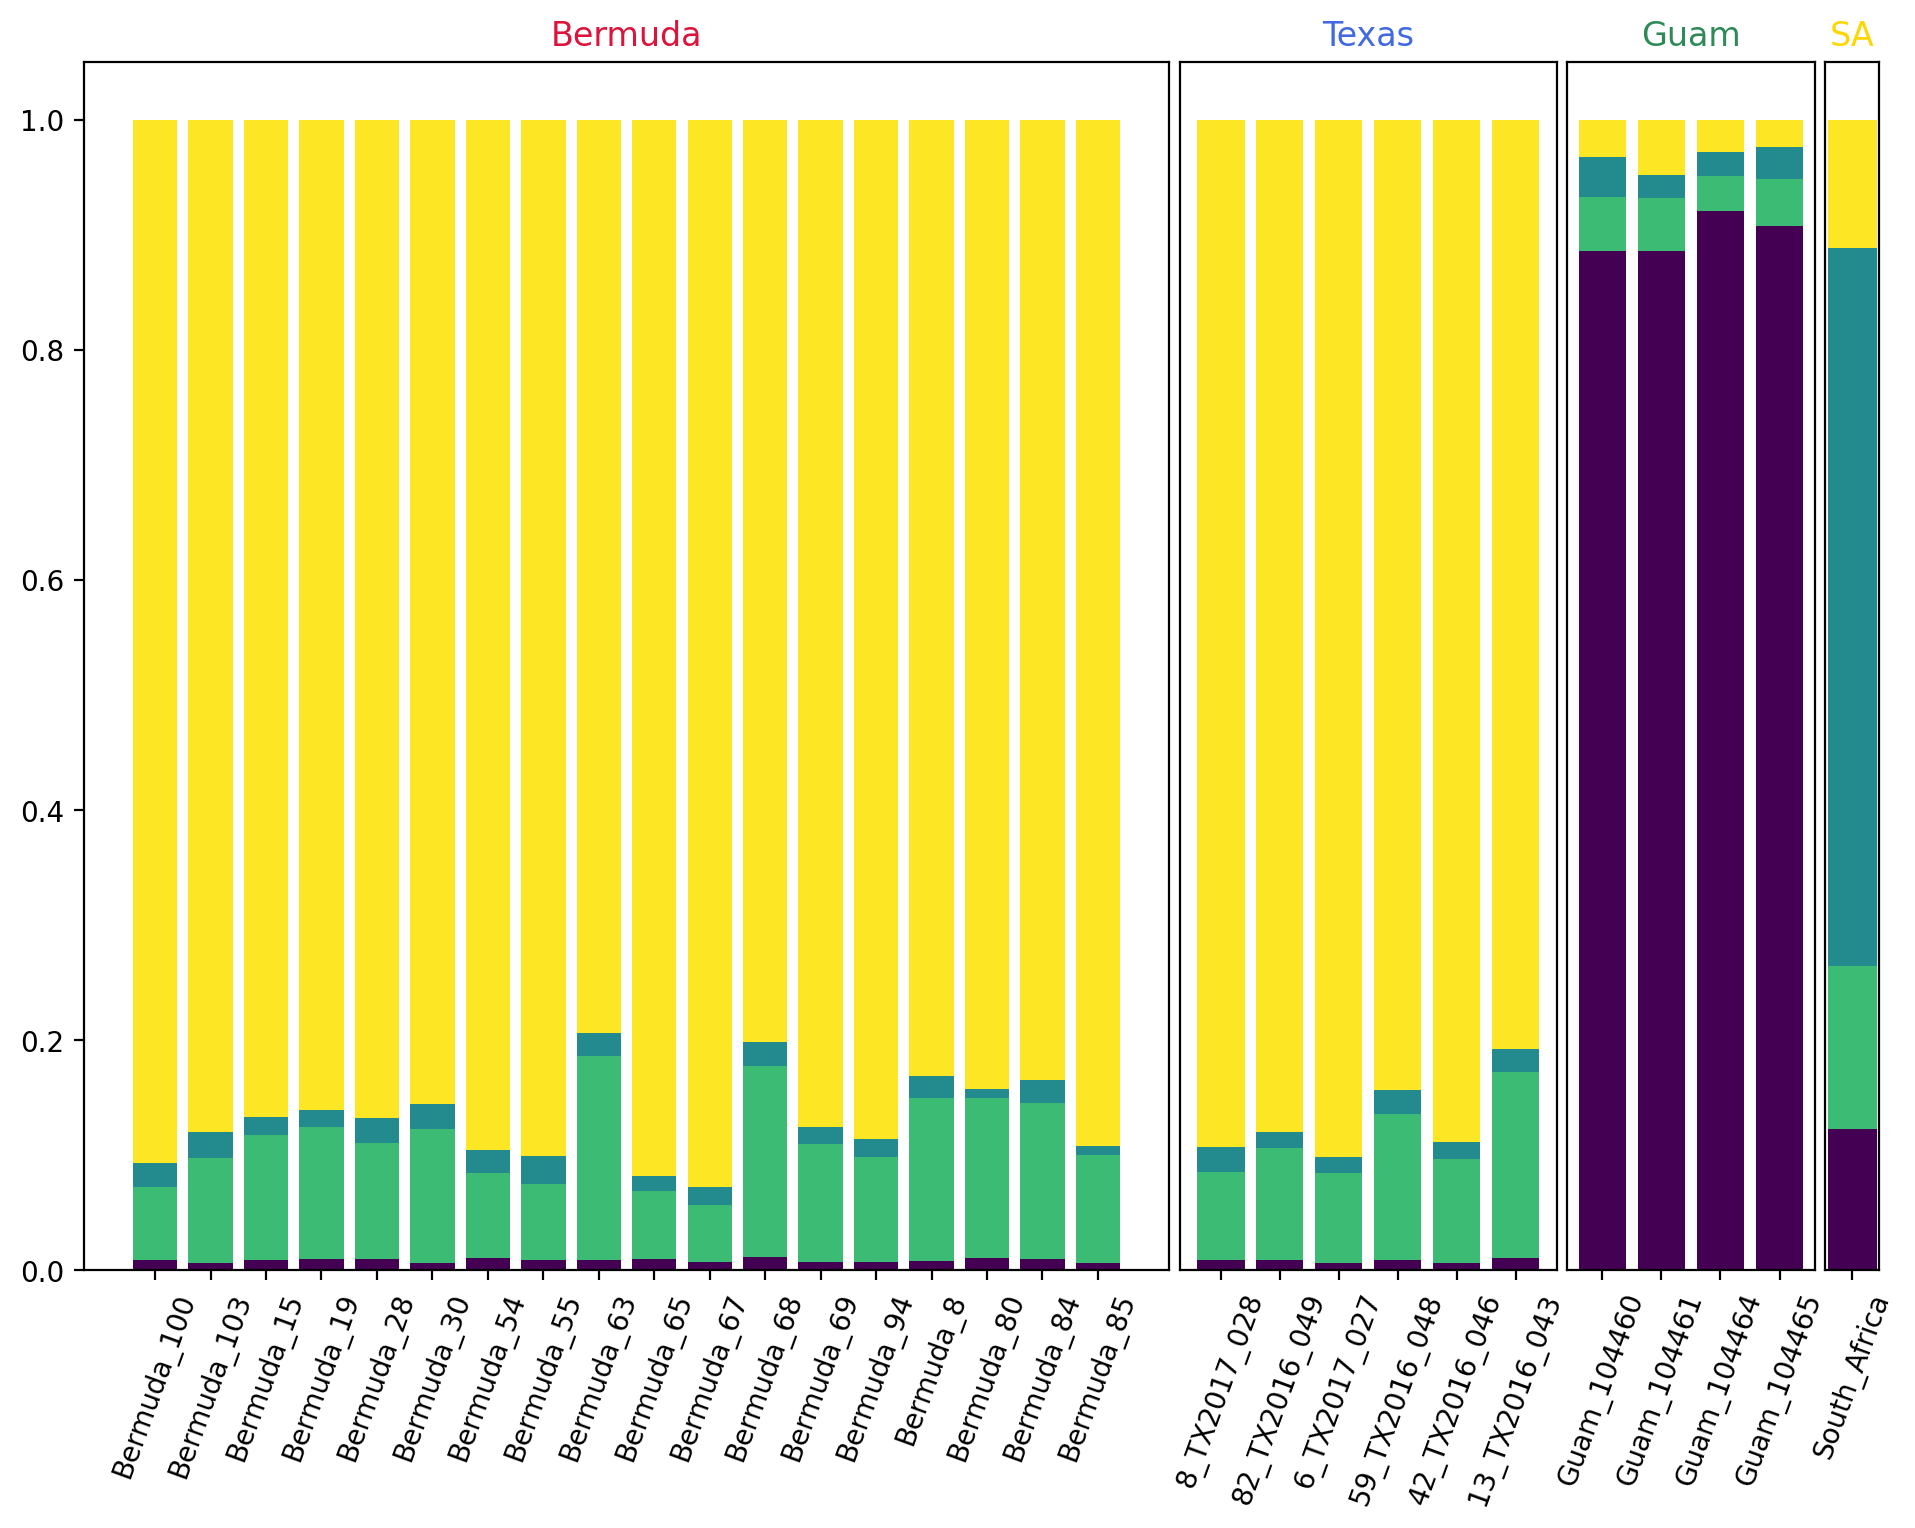

In [24]:
fig = plt.figure( figsize = (12,8), dpi=200)
gs = fig.add_gridspec(1, 29)


ax1 = fig.add_subplot(gs[0:17])
plt.xticks(rotation=45) 
ax1.bar(table.index[0:19], table[0].iloc[0:19], color = "#440154FF")
ax1.bar(table.index[0:19], table[1].iloc[0:19], bottom = +table[0].iloc[0:19], color = "#3CBB75FF")
ax1.bar(table.index[0:19], table[2].iloc[0:19], bottom = table[0].iloc[0:19]++table[1].iloc[0:19], color = "#238A8DFF")
ax1.bar(table.index[0:19], table[3].iloc[0:19], bottom = table[0].iloc[0:19]+table[1].iloc[0:19] + table[2].iloc[0:19], color = "#FDE725FF")
ax1.tick_params(axis='x', rotation=70)
ax1.set_title("Bermuda", c = "crimson")

ax2 = fig.add_subplot(gs[17:23], sharey = ax1 )
ax2.bar(table.index[24:], table[0].iloc[24:], color = "#440154FF")
ax2.bar(table.index[24:], table[1].iloc[24:], bottom = table[0].iloc[24:], color = "#3CBB75FF")
ax2.bar(table.index[24:], table[2].iloc[24:], bottom = table[0].iloc[24:]+table[1].iloc[24:], color = "#238A8DFF")
ax2.bar(table.index[24:], table[3].iloc[24:], bottom = table[0].iloc[24:]+table[1].iloc[24:] + table[2].iloc[24:], color = "#FDE725FF")
ax2.tick_params(axis='x', rotation=70)
ax2.axes.get_yaxis().set_visible(False)
ax2.set_title("Texas", c = "royalblue")

ax3 = fig.add_subplot(gs[23:27], sharey = ax1 )
ax3.bar(table.index[19:23], table[0].iloc[19:23], color = "#440154FF")
ax3.bar(table.index[19:23], table[1].iloc[19:23], bottom = table[0].iloc[19:23], color = "#3CBB75FF")
ax3.bar(table.index[19:23], table[2].iloc[19:23], bottom = table[0].iloc[19:23]+table[1].iloc[19:23], color = "#238A8DFF")
ax3.bar(table.index[19:23], table[3].iloc[19:23], bottom = table[0].iloc[19:23]+table[1].iloc[19:23] + table[2].iloc[19:23], color = "#FDE725FF")
ax3.tick_params(axis='x', rotation=70)
ax3.axes.get_yaxis().set_visible(False)
ax3.set_title("Guam", c = "seagreen")

ax4 = fig.add_subplot(gs[27], sharey = ax1)
ax4.bar(table.index[23], table[0].iloc[23], color = "#440154FF")
ax4.bar(table.index[23], table[1].iloc[23], bottom = table[0].iloc[23], color = "#3CBB75FF")
ax4.bar(table.index[23], table[2].iloc[23], bottom = table[0].iloc[23]+table[1].iloc[23], color = "#238A8DFF")
ax4.bar(table.index[23], table[3].iloc[23], bottom = table[0].iloc[23]+table[1].iloc[23] + table[2].iloc[23], color = "#FDE725FF")
ax4.tick_params(axis='x', rotation=70)
ax4.axes.get_yaxis().set_visible(False)
ax4.set_title("SA", c = "gold")


fig.show()


**Fig 6:** Ancestry proportions for all samples.

We observe that the ancestry proportions for the Bermuda and Texas samples are very similar, and they are primarily members in the yellow group, with some proprotion from the green as well. Samples from Guam are primarily members of the purple group, whereas the South African sample appears to be a member primarily of the blue group, with a non-insignificant membership in all other groups as well.

## Discussion

Our attempts at assembling the data both with the masked and unmasked reference genome were successful, with thousands of loci generated for all of the samples. However, our masked reference genome may have mapped the a number of the reads incorrectly, as indicated by a substantial number of paired end reads covering a fraction of the distance we would expect them to. Simply using the unmasked reference may also be problematic, as with the large number of repeats in the genome, it is possible that sequences are being mapped to different repeats of the same sequence. Further evalution of these two methods is needed to determine which is best for further studies. 

Both the PCA and STRUCTURE analysis have revealed that there is global population structure among Portuguese Man of War, in ways that make sense biologically and oceanographically. The two sets of samples that we have in the same gyre, Texas and Bermuda, both have very similar ancestral proportions and are primarily members in one ancestral population, perhaps originally in the Northern Atlantic gyre. They also are members in a second group, shown in Fig. 6 in green, which perhaps corresponds to a Southern Atlantic gyre. South Africa is primarily a member in the third group, represented in blue in Fig. 6, which likely represents the Indian Ocean gyre, whose waters the sample was found in. However, the sample from South Africa is also partially a member of the second group; its location near the mixing point between the Southern Atlantic and the Indianc Ocean would support the second group being based in the South Atlantic gyre.The final set of samples from Guam is a member primarily of the fourth and final group, likely representing an ancestral population from the Northern Pacific gyre. 

In order to make more conclusive statements, more samples are needed. The current dataset is biased towards samples from Bermuda and Texas, which can be seen by the fact that two out of the first three principal components explain variance in within the Bermuda and Texas samples. More samples from other gyres besides the North Atlantic would help with this issue. In particular, we do not have any samples that definitively originated the South Atlantic, South Pacific or Indian gyres. It would also be interesting to look at more samples within the same gyre, both a different locations as well as at different time of the year. As Portuguese Man of War appear seasonally in these different locations, it would be interesting to see whether individuals arriving at different times correspond to different subpopulations within gyre.

This project has revealed that there is indeed global population structure among Portuguese Man of War. Further work is needed to determine the best way to assemble the ddRADseq data, though the initial results are promising. Based on the preliminary population structure results, we are able to begin to make inferences about the life of these unique creatures at sea, though in order to make more definitive statements, more samples across and within the five primary ocean gyres are need.  

## References
- Eaton, D. A. and I. Overcast (2020). "ipyrad: Interactive assembly and analysis of RADseq datasets." Bioinformatics 36(8): 2592-2594.
- EVANNO, G., S. REGNAUT and J. GOUDET (2005). "Detecting the number of clusters of individuals using the software structure: a simulation study." Molecular Ecology 14(8): 2611-2620.
- Jakobsson, M. and N. A. Rosenberg (2007). "CLUMPP: a cluster matching and permutation program for dealing with label switching and multimodality in analysis of population structure." Bioinformatics 23(14): 1801-1806.
- Lawson, D. J., L. Van Dorp and D. Falush (2018). "A tutorial on how not to over-interpret STRUCTURE and ADMIXTURE bar plots." Nature Communications 9(1): 1-11.
- Munro, C., Z. Vue, R. R. Behringer and C. W. Dunn (2019). "Morphology and development of the Portuguese man of war, Physalia physalis." Scientific reports 9(1): 1-12.
- NOAA. "What is a gyre?", from https://oceanservice.noaa.gov/facts/gyre.html.
- Pontin, D. and R. Cruickshank (2012). "Molecular phylogenetics of the genus Physalia (Cnidaria: Siphonophora) in New Zealand coastal waters reveals cryptic diversity." Hydrobiologia 686(1): 91-105.
- Raj, A., M. Stephens and J. K. Pritchard (2014). "fastSTRUCTURE: variational inference of population structure in large SNP data sets." Genetics 197(2): 573-589.
- Reitzel, A., S. Herrera, M. Layden, M. Martindale and T. Shank (2013). "Going where traditional markers have not gone before: utility of and promise for RAD sequencing in marine invertebrate phylogeography and population genomics." Molecular ecology 22(11): 2953-2970
